# <center>Bad Bank Behavior<br>Analyzing Bank Mortgage during the 2007 Housing Bubble</center>  

<center>Michael Siebel</center>
<center>August 2020</center>

<br>
    
## Table of Contents
- [Goals](#Goals)<br>
- [Load Packages](#Load-Packages)<br>
- [Set Up Functions](#Set-Up-Functions)<br>
- [Implement Data Cleanings](#Implement-Data-Cleanings)<br>
- [Analysis Functions](#Analysis-Functions)<br>
- [Imbalanced Prediction](#Imbalanced-Prediction)
- [Downsampling Prediction](#Downsampling-Prediction)<br>
- [Upsampling Prediction](#Upsampling-Prediction)<br>
- [Conclusion](#Conclusion)<br>

# Goals  
<br>

 

***

# Load Packages

In [12]:
# Core Packages
import pandas as pd
import numpy as np
import random
import glob
import pickle
# Convert Time Features
from datetime import datetime as dt
# Data Visualizations
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='chesterish', grid=False)
# Imputing Data
from sklearn.impute import KNNImputer
# Splitting Data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Machine Learning Packages
from sklearn.ensemble import StackingClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SVMSMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Save Runtime
import time
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# Output Statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

Data_Mining.ipynb:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "cell_type": "markdown",


   Harmonized Credit Score  Credit Score  Co-Borrower Credit Score
0                   739.25         741.0                     734.0
1                   787.50         796.0                     762.0
2                   710.00         710.0                       NaN
3                   747.50         778.0                     656.0
4                   715.00         720.0                     700.0
5                   750.50         753.0                     743.0
6                   696.25         674.0                     763.0
7                   749.00         749.0                       NaN
8                   777.00         777.0                       NaN
9                   619.00         619.0                       NaN

The number of features is:
28

The number of observations is:
1246499


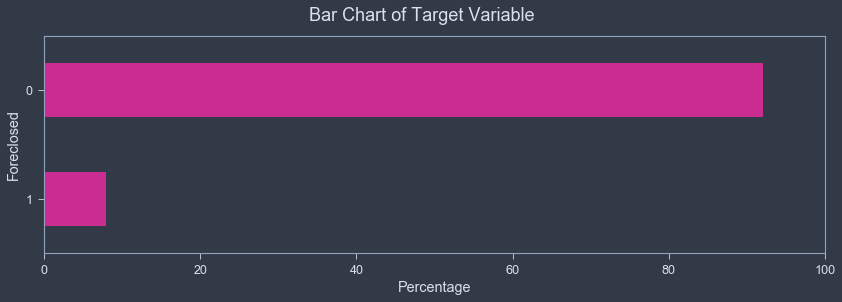

Frequency of Foreclosures
0    1143652
1     102847
Name: Foreclosed, dtype: int64

Percentage of Foreclosures
0    92
1     8
Name: Foreclosed, dtype: int32

Foreclosed (%) max value
01/2007
Foreclosed (%) max value


,Foreclosed (%)
Bank,
FLAGSTAR CAPITAL MARKETS CORPORATION,11.3


None

02/2007
Foreclosed (%) max value


,Foreclosed (%)
Bank,
CHASE HOME FINANCE (CIE 1),12.2


None

03/2007
Foreclosed (%) max value


,Foreclosed (%)
Bank,
"GMAC MORTGAGE, LLC",9.6


None

04/2007
Foreclosed (%) max value


,Foreclosed (%)
Bank,
FLAGSTAR CAPITAL MARKETS CORPORATION,10.8


None

05/2007
Foreclosed (%) max value


,Foreclosed (%)
Bank,
FLAGSTAR CAPITAL MARKETS CORPORATION,10.0


None

06/2007
Foreclosed (%) max value


,Foreclosed (%)
Bank,
FLAGSTAR CAPITAL MARKETS CORPORATION,11.7


None

07/2007
Foreclosed (%) max value


,Foreclosed (%)
Bank,
SUNTRUST MORTGAGE INC.,10.9


None

08/2007
Foreclosed (%) max value


,Foreclosed (%)
Bank,
"FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB",10.8


None

09/2007
Foreclosed (%) max value


,Foreclosed (%)
Bank,
"FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB",17.9


None

10/2007
Foreclosed (%) max value


,Foreclosed (%)
Bank,
"FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB",18.6


None

11/2007
Foreclosed (%) max value


,Foreclosed (%)
Bank,
"FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB",18.8


None

12/2007
Foreclosed (%) max value


,Foreclosed (%)
Bank,
"FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB",21.1


None



In [13]:
# remember to import io and sys
import io
import sys

# create a text trap and redirect stdout
text_trap = io.StringIO()
sys.stdout = text_trap

# execute previous script
%run Data_Mining.ipynb

# now restore stdout function
sys.stdout = sys.__stdout__

***

# Modeling

Keep:
AMTRUST BANK
BANK OF AMERICA, N.A.
CITIMORTGAGE, INC.
FIRST TENNESSEE BANK NATIONAL ASSOCIATION
FLAGSTAR CAPITAL MARKETS CORPORATION	
GMAC MORTGAGE, LLC
JPMORGAN CHASE BANK, NATIONAL ASSOCIATION
OTHER	
PNC BANK, N.A.
SUNTRUST MORTGAGE INC.

Small:
BISHOPS GATE RESIDENTIAL MORTGAGE TRUST
FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB
FREEDOM MORTGAGE CORP.
GMAC MORTGAGE, LLC (USAA FEDERAL SAVINGS BANK)
HSBC BANK USA, NATIONAL ASSOCIATION
PHH MORTGAGE CORPORATION (USAA FEDERAL SAVINGS BANK)
THIRD FEDERAL SAVINGS AND LOAN
WELLS FARGO BANK, N.A.

Collapse:
CHASE HOME FINANCE	
CHASE HOME FINANCE (CIE 1)	
CHASE HOME FINANCE, LLC

In [14]:
# Small loan banks
Small_Loan = ['BISHOPS GATE RESIDENTIAL MORTGAGE TRUST', 
              'FREEDOM MORTGAGE CORP.', 'GMAC MORTGAGE, LLC (USAA FEDERAL SAVINGS BANK)', 
              'HSBC BANK USA, NATIONAL ASSOCIATION', 'PHH MORTGAGE CORPORATION (USAA FEDERAL SAVINGS BANK)', 
              'THIRD FEDERAL SAVINGS AND LOAN', 'WELLS FARGO BANK, N.A.']
df = df.replace({'Bank': Small_Loan}, 'SMALL LOAN BANKS')

# Collapse similar banks
Chase = ["CHASE HOME FINANCE (CIE 1)", "CHASE HOME FINANCE, LLC"]
df = df.replace({'Bank': Chase}, 'CHASE HOME FINANCE')

df['Bank'].value_counts()

BANK OF AMERICA, N.A.                        371423
OTHER                                        213459
CITIMORTGAGE, INC.                           135536
SMALL LOAN BANKS                             112134
JPMORGAN CHASE BANK, NATIONAL ASSOCIATION     88255
GMAC MORTGAGE, LLC                            75599
PNC BANK, N.A.                                63726
SUNTRUST MORTGAGE INC.                        53548
AMTRUST BANK                                  38024
FLAGSTAR CAPITAL MARKETS CORPORATION          34789
FIRST TENNESSEE BANK NATIONAL ASSOCIATION     28718
CHASE HOME FINANCE                            15791
FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB       9966
Name: Bank, dtype: int64

In [113]:
# Variables to drop
dropvars = ['Year', 'Quarter', 'Original Date', 'Credit Score', 
            'Zip Code', 'Mortgage Insurance Type']  # 'Property State', 

# All Data
All_X = df.drop(labels=dropvars, axis=1)
All_y = All_X['Foreclosed']
All_X = All_X.drop(labels='Foreclosed', axis=1) 

# split dataset
X_train, X_test, y_train, y_test = train_test_split(All_X, All_y, test_size = 0.3, 
                                                    stratify = All_y, random_state=2020)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, 
                                                stratify = y_test, random_state=2020)

# List of banks
Banks = ['AMTRUST BANK', 'BANK OF AMERICA, N.A.', 'CITIMORTGAGE, INC.', 
         'FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB', 
         'FIRST TENNESSEE BANK NATIONAL ASSOCIATION', 'FLAGSTAR CAPITAL MARKETS CORPORATION', 
         'GMAC MORTGAGE, LLC', 'JPMORGAN CHASE BANK, NATIONAL ASSOCIATION', 'OTHER', 
         'PNC BANK, N.A.', 'SUNTRUST MORTGAGE INC.', 'CHASE HOME FINANCE', 'SMALL LOAN BANKS']

# Function to subset banking datasets
def Bank_Subsets(bank_strs, df_X = X_train, df_y = y_train):
    # Initiate Bank dictionaries
    X = {}
    y = {}

    # Bank Subset
    for bank_str in bank_strs:
        X[bank_str] = onehotencoding( df_X[df_X['Bank']==bank_str] \
            .drop(labels='Bank', axis=1) )
        y[bank_str] = y_train[X_train['Bank']==bank_str]
    
    return X, y

# Run Function
Banks_X, Banks_y = Bank_Subsets(Banks)
    
# One hot encoding on remaining data
X_train = onehotencoding(X_train)
X_test = onehotencoding(X_test) 
X_val = onehotencoding(X_val)

In [23]:
# SMOTE
# sm = SVMSMOTE(random_state=2020, out_step=0.75, n_jobs=-1)
# X_train, y_train = sm.fit_resample(X_train, y_train)

# Model fit
# model_bal.fit(X, y)
# y_proba_bal = pd.DataFrame(model_bal.predict_proba(X_test), columns=["Did not Foreclose", "Foreclosed"])
# model_wgt.fit(X, y)
# y_proba_wgt = pd.DataFrame(model_wgt.predict_proba(X_test), columns=["Did not Foreclose", "Foreclosed"])
# model_gbm.fit(X, y)
# y_proba_gbm = pd.DataFrame(model_gbm.predict_proba(X_test), columns=["Did not Foreclose", "Foreclosed"])
# model_knn.fit(X, y)
# y_proba_knn = pd.DataFrame(model_knn.predict_proba(X_test), columns=["Did not Foreclose", "Foreclosed"])

In [50]:
# Define models
model_bal = BalancedRandomForestClassifier(n_estimators=50, random_state=2020, max_features=0.75,
                                           replacement=True, sampling_strategy='auto', n_jobs=-1)
model_wgt = RandomForestClassifier(n_estimators=50, random_state=2020, max_features=0.75, 
                                   class_weight={0:0.25, 1:0.75}, n_jobs=-1)
model_reg = RandomForestClassifier(n_estimators=200, random_state=2020, max_features=0.75, n_jobs=-1)
model_gbm = GradientBoostingClassifier(n_estimators=200, random_state=2020)
model_knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)

In [51]:
# Model Dictionaries
bnk_scalers = {}
bnk_test = {}
bnk_models = {}
bnk_scores = {}
bnk_proba = {}

# Loop
for bank_str in Banks_X:
    # define datasets
    y = Banks_y[bank_str]
    X = Banks_X[bank_str]
    
    # Standardize Vars
    X_cols = X.columns
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    bnk_X_test = scaler.transform(X_test[X_cols])
    
    # Bottom Layer
    estimators = [
        ('bal', model_bal),
        ('wgt', model_wgt)
        #('reg', model_reg)
    ]
    clf = StackingClassifier(
        estimators=estimators, 
        stack_method='predict_proba',
        final_estimator=LogisticRegression(max_iter=100, n_jobs=-1)
    )
    
    # Save to Model Dictionaries
    bnk_scalers[bank_str] = scaler
    bnk_test[bank_str] = bnk_X_test
    bnk_models[bank_str] = clf.fit(X, y)
    bnk_scores[bank_str] = bnk_models[bank_str].score(bnk_X_test, y_test)
    bnk_proba[bank_str] = pd.DataFrame(clf.predict_proba(X), columns=["Did not Foreclose", "Foreclosed"])
    print('...completed modeling', bank_str)

In [52]:
file_to_store = open("bnk_scalers.pickle", "wb")
pickle.dump(bnk_scalers, file_to_store)
file_to_store = open("bnk_test.pickle", "wb")
pickle.dump(bnk_test, file_to_store)
file_to_store = open("bnk_models.pickle", "wb")
pickle.dump(bnk_models, file_to_store)
file_to_store = open("bnk_scores.pickle", "wb")
pickle.dump(bnk_scores, file_to_store)
file_to_store = open("bnk_proba.pickle", "wb")
pickle.dump(bnk_proba, file_to_store)
file_to_store.close()

In [ ]:
file_to_open = open('bnk_scalers.pickle', 'r') 
bnk_scalers = pickle.load(file_to_open)
file_to_open = open('bnk_test.pickle', 'r') 
bnk_test = pickle.load(file_to_open)
file_to_open = open('bnk_models.pickle', 'r') 
bnk_models = pickle.load(file_to_open)
file_to_open = open('bnk_scores.pickle', 'r') 
bnk_scores = pickle.load(file_to_open)
file_to_open = open('bnk_proba.pickle', 'r') 
bnk_proba = pickle.load(file_to_open)
file_to_open.close()

In [95]:
# Model Dictionaries
all_scalers = {}
all_test = {}
all_models = {}
all_scores = {}
all_proba = {}

# Loop
for bank_str in ['AMTRUST BANK']:
    # define datasets
    y = y_train   
    X = X_train
    readd = X[str('Bank_' + bank_str)]
    X = X.filter(regex=r'^(?!Bank_).*$')
    X[str('Bank_' + bank_str)] = readd

    # Standardize Vars
    X_cols = X.columns
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    all_X_test = scaler.transform(X_test[X_cols])    
    
    # Bottom Layer
    estimators = [
        ('bal', model_bal),
        ('wgt', model_wgt)
    ]
    clf = StackingClassifier(
        estimators=estimators, 
        stack_method='predict_proba',
        final_estimator=LogisticRegression(max_iter=100, n_jobs=-1)
    )
    
    # Save to Model Dictionaries
    all_scalers[bank_str] = scaler
    all_test[bank_str] = all_X_test
    all_models[bank_str] = clf.fit(X, y)
    all_scores[bank_str] = all_models[bank_str].score(all_X_test, y_test)
    all_proba[bank_str] = pd.DataFrame(clf.predict_proba(X), columns=["Did not Foreclose", "Foreclosed"])
    print('...completed modeling', bank_str)

c:\python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


...completed modeling AMTRUST BANK


In [ ]:
import pickle
file_to_store = open("all_scalers.pickle", "wb")
pickle.dump(all_scalers, file_to_store)
file_to_store = open("all_test.pickle", "wb")
pickle.dump(all_test, file_to_store)
file_to_store = open("all_models.pickle", "wb")
pickle.dump(all_models, file_to_store)
file_to_store = open("all_scores.pickle", "wb")
pickle.dump(all_scores, file_to_store)
file_to_store = open("all_proba.pickle", "wb")
pickle.dump(all_proba, file_to_store)
file_to_store.close()

In [ ]:
file_to_open = open('all_scalers.pickle', 'r') 
all_scalers = pickle.load(file_to_open)
file_to_open = open('all_test.pickle', 'r') 
all_test = pickle.load(file_to_open)
file_to_open = open('all_models.pickle', 'r') 
all_models = pickle.load(file_to_open)
file_to_open = open('all_scores.pickle', 'r') 
all_scores = pickle.load(file_to_open)
file_to_open = open('all_proba.pickle', 'r') 
all_proba = pickle.load(file_to_open)
file_to_open.close()

In [91]:
def threshold(target_prob, y_test = y_test):
    # Determine threshold
    threshold = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 
                 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
    
    acc = []
    prec = []
    f1 = []
    avg = []
    best_avg = {'Iteration': -1, 'Threshold': 0.5, 'Best Avg Score': 0.0}
    best_acc = {'Iteration': -1, 'Threshold': 0.5, 'Best Accuracy Score': 0.0}
    best_prec = {'Iteration': -1, 'Threshold': 0.5, 'Best Precision Score': 0.0}
    best_f1 = {'Iteration': -1, 'Threshold': 0.5, 'Best F1 Score': 0.0}
    for i in range(len(threshold)):
        y_pred = target_prob.map(lambda x: 1 if x >= threshold[i] else 0)
        
        # Accuracy
        acc.append(accuracy_score(y_test, y_pred).round(2))
        # Precision
        prec.append(precision_score(y_test, y_pred).round(2))
        # F1 
        f1.append(f1_score(y_test, y_pred).round(2))
        # Avg
        avg.append( 3 * ( (acc[i]*prec[i]*f1[i]) / (acc[i]+prec[i]+f1[i]) ) )
        
        # Save best accuracy
        if (best_acc['Best Accuracy Score'] < acc[i]):
            best_acc = {'Iteration': i, 'Threshold': threshold[i], 'Best Accuracy Score': acc[i]}
        # Save best precision
        if (best_prec['Best Precision Score'] < prec[i]):
            best_prec = {'Iteration': i, 'Threshold': threshold[i], 'Best Precision Score': prec[i]}      
        # Save best f1
        if (best_f1['Best F1 Score'] < f1[i]):
            best_f1 = {'Iteration': i, 'Threshold': threshold[i], 'Best F1 Score': f1[i]}       
        # Save best avg
        if (best_avg['Best Avg Score'] < avg[i]):
            best_avg = {'Iteration': i, 'Threshold': threshold[i], 'Best Avg Score': avg[i]}   
    
    # Plot
    df_plot = pd.DataFrame({'Threshold': threshold, 'Accuracy': acc, 'Precision': prec, 'F1': f1})
    plt.figure(figsize=(12,4))
    plt.plot(df_plot['Threshold'], df_plot.iloc[:,1:4])
    plt.title('Scores at Various Thresholds')
    plt.legend(['Accuracy', 'Precision', 'F1'])
    return( plt.show() )

AMTRUST BANK
Score: 91.7


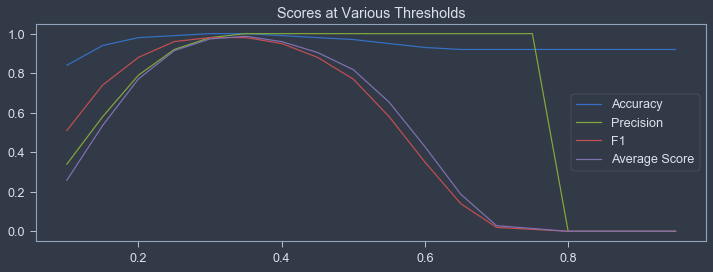

None
BANK OF AMERICA, N.A.
Score: 91.7


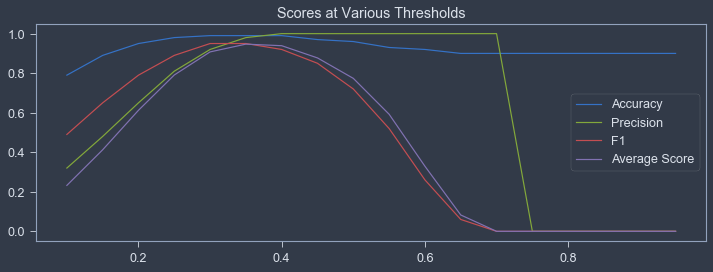

None
CITIMORTGAGE, INC.
Score: 91.7


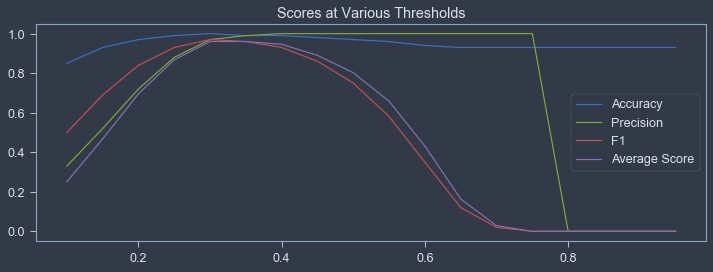

None
FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB
Score: 91.60000000000001


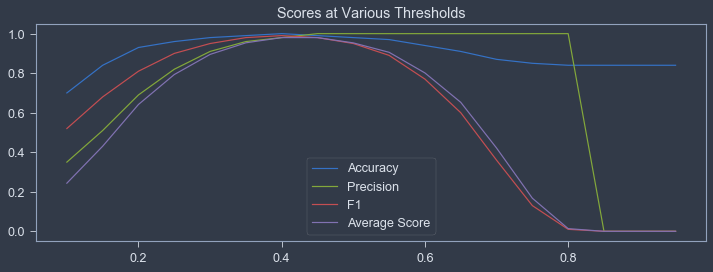

None
FIRST TENNESSEE BANK NATIONAL ASSOCIATION
Score: 91.7


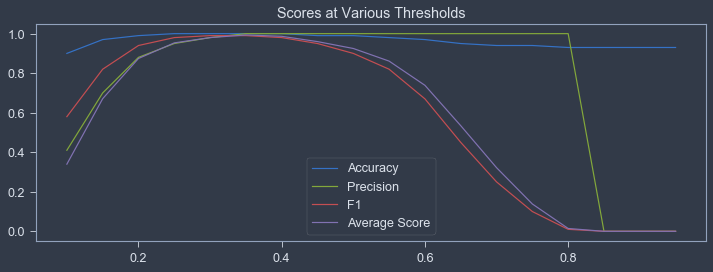

None
FLAGSTAR CAPITAL MARKETS CORPORATION
Score: 91.7


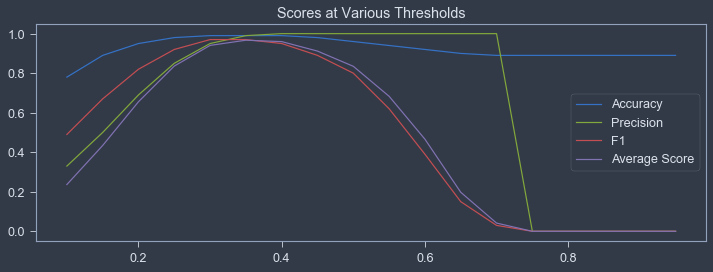

None
GMAC MORTGAGE, LLC
Score: 91.7


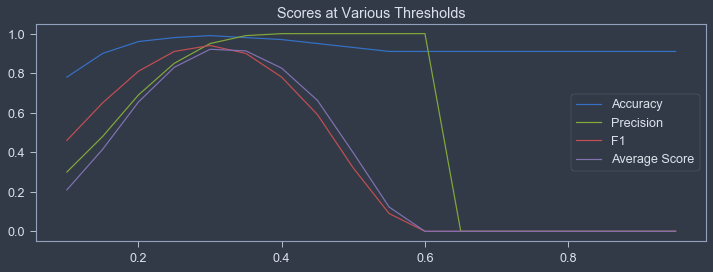

None
JPMORGAN CHASE BANK, NATIONAL ASSOCIATION
Score: 91.7


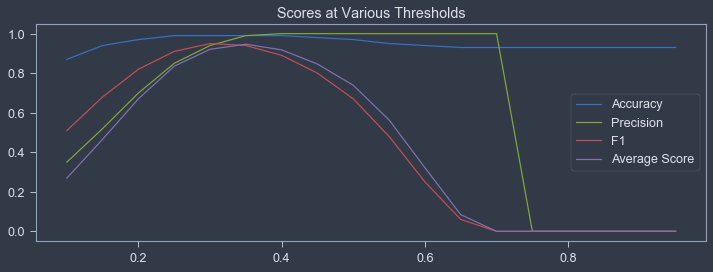

None
OTHER
Score: 91.7


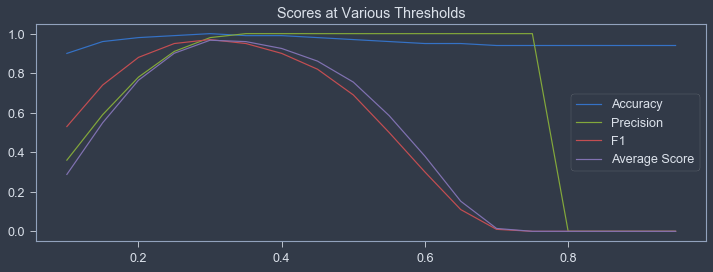

None
PNC BANK, N.A.
Score: 91.7


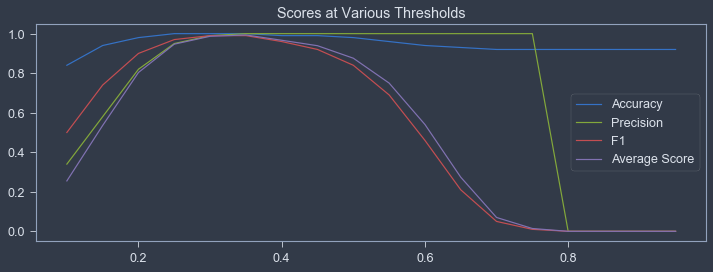

None
SUNTRUST MORTGAGE INC.
Score: 91.7


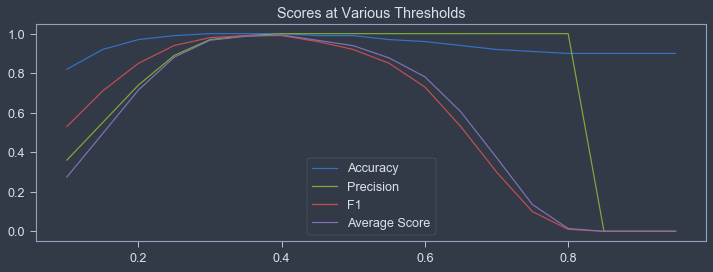

None
CHASE HOME FINANCE
Score: 91.7


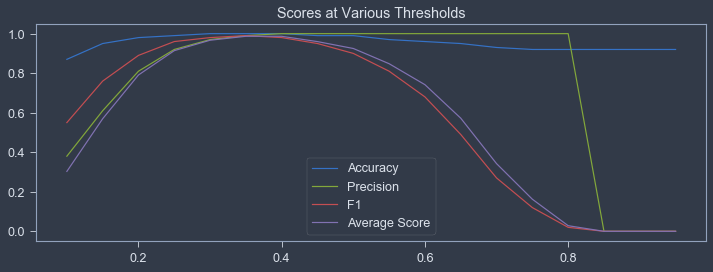

None
SMALL LOAN BANKS
Score: 91.7


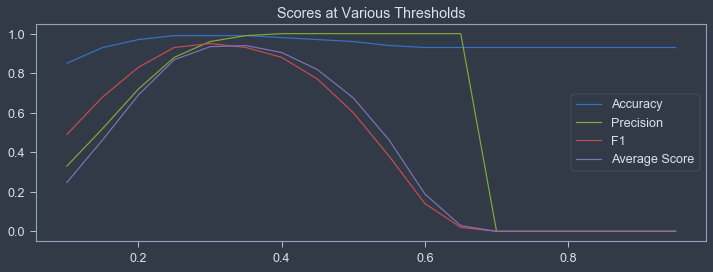

None


In [75]:
# Check indiv-bank models on training set
for bank_str in Banks_X:
    print(bank_str)
    print('Score:', bnk_scores[bank_str].round(3)*100)
    proba = bnk_proba[bank_str]['Foreclosed']
    print(threshold(proba, Banks_y[bank_str]))

In [ ]:
# Check indiv-bank models on test set
for bank_str in Banks_X:
    subset = np.array(X_test[str('Bank_' + bank_str)]==1)
    test = bnk_test[bank_str][subset]
    proba = pd.DataFrame(bnk_models[bank_str].predict_proba(test), 
                                       columns=["Did not Foreclose", "Foreclosed"])
    print(bank_str)
    proba = proba['Foreclosed']
    print(threshold(proba, y_test[subset]))

AMTRUST BANK
Score: 91.8


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


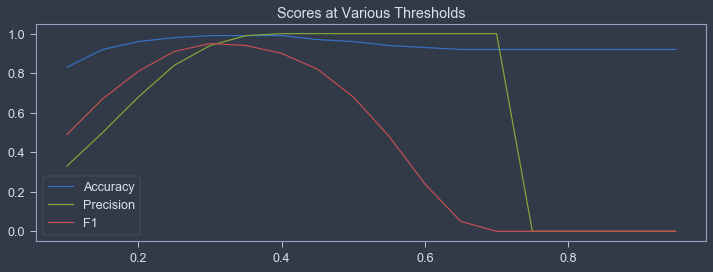

None


In [98]:
# Check all-bank models on training set
for bank_str in ['AMTRUST BANK']:
    print(bank_str)  
    print('Score:', all_scores[bank_str].round(3)*100)
    proba = all_proba[bank_str]['Foreclosed']
    print(threshold(proba, y_train))

AMTRUST BANK


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


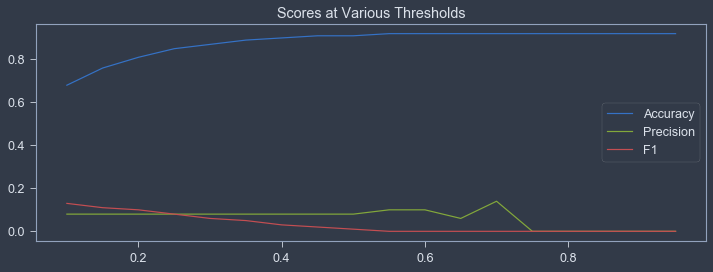

None


In [143]:
# Check all-bank models on test set
for bank_str in ['AMTRUST BANK']:
    proba = pd.DataFrame(all_models[bank_str].predict_proba(all_test[bank_str]), 
                                       columns=["Did not Foreclose", "Foreclosed"])
    print(bank_str)
    proba = proba['Foreclosed']
    print(threshold(proba, y_test, y_val))

In [135]:
# Model Dictionaries
bottom_layer = {}
final_models = {}
final_scores = {}
final_proba = {}

# Loop
for bank_str in ['AMTRUST BANK']:
    # Predict onto test data
    final_bnk_proba = pd.DataFrame(bnk_models[bank_str].predict_proba(bnk_test[bank_str]), 
                                   columns=["Did not Foreclose", "Foreclosed"])
    final_all_proba = pd.DataFrame(all_models[bank_str].predict_proba(all_test[bank_str]), 
                                   columns=["Did not Foreclose", "Foreclosed"])
    
    # Define datasets
    bottom_layer[bank_str] = pd.DataFrame({'Ind Banks': final_bnk_proba['Foreclosed'], 
                                           'All Banks': final_all_proba['Foreclosed']})

    # Top Layer
    clf = LogisticRegression(max_iter=100, n_jobs=-1)
    
    # Save to Model Dictionaries
    final_models[bank_str] = clf.fit(bottom_layer[bank_str], pd.concat([y_test, y_val]))
    final_scores[bank_str] = final_models[bank_str].score(bottom_layer[bank_str], pd.concat([y_test, y_val]))
    final_proba[bank_str] = pd.DataFrame(clf.predict_proba(bottom_layer[bank_str]), 
                                         columns=["Did not Foreclose", "Foreclosed"])
    print('...completed modeling', bank_str)

...completed modeling AMTRUST BANK


AMTRUST BANK
Score: 91.7


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


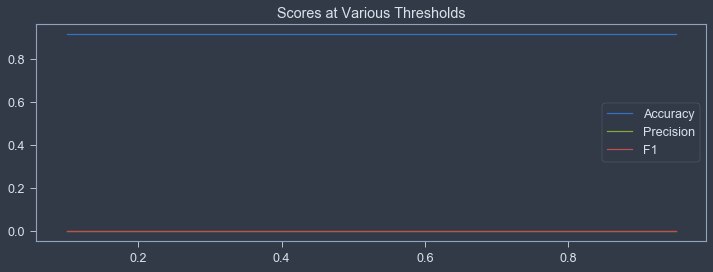

None


In [137]:
# Check final models on validation set
for bank_str in ['AMTRUST BANK']:
    print(bank_str)
    print('Score:', final_scores[bank_str].round(3)*100)
    proba = final_proba[bank_str]['Foreclosed']
    print(threshold(proba, pd.concat([y_test, y_val])))

In [140]:
final_proba[bank_str]['Foreclosed'].describe()

count    372291.000000
mean          0.082739
std           0.001394
min           0.072973
25%           0.082205
50%           0.083232
75%           0.083744
max           0.087514
Name: Foreclosed, dtype: float64

In [117]:
bottom_layer[bank_str]

,Ind Banks,All Banks
0,0.132108,0.186877
1,0.053763,0.137335
2,0.014986,0.012137
3,0.142861,0.240164
4,0.148087,0.128272
...,...,...
372286,0.016467,0.007810
372287,0.017219,0.011595
372288,0.340963,0.482296
372289,0.061212,0.140370


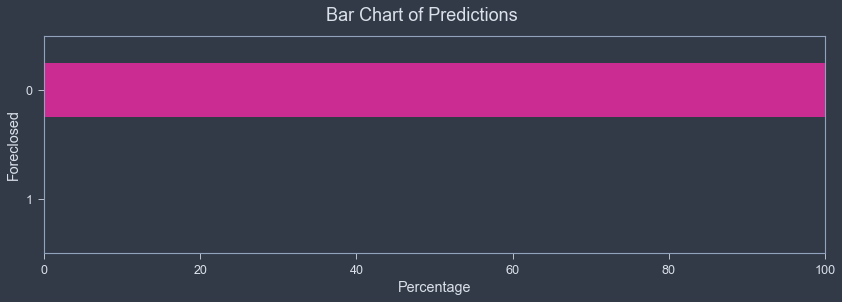

Frequency of Foreclosures
0    370531
1      1760
Name: Foreclosed, dtype: int64

Percentage of Foreclosures
0    100
1      0
Name: Foreclosed, dtype: int32


Confusion matrix:
              Predicted False  Predicted True
Actual False           340565             923
Actual True             29966             837

Final F1 Score:
0.05

Final Precision Percentages:
Actual False    52.4
Actual True     47.6
Name: Predicted True, dtype: float64

Final Recall Percentages:
Predicted False    99.7
Predicted True      0.3
Name: Actual False, dtype: float64


In [28]:
# Use best threshold
y_pred = y_proba["Foreclosed"].map(lambda x: 1 if x >= 0.5 else 0)

# Table of predictions versus actuals
target_values(y_pred, prediction=True)
    
# Confusion Matrix
print("\nConfusion matrix:")
PredictTable = pd.crosstab(y_test, np.array(y_pred))
PredictTable.columns = ['Predicted False', 'Predicted True']
PredictTable.index = ['Actual False', 'Actual True']
print(PredictTable)
# F1 Score
print("\nFinal F1 Score:")
print(f1_score(y_test, y_pred).round(2))
# Precision Table
print('\nFinal Precision Percentages:')
PrecisionTable = ( (PredictTable/(PredictTable.sum(0)))*100 ).round(1)
print(PrecisionTable.iloc[:,1])
# Recall Table
print('\nFinal Recall Percentages:')
RecallTable = ( (PredictTable.div(PredictTable.sum(axis=1), axis=0))*100 ).round(1)
print(RecallTable.iloc[0,:])

In [617]:
y_proba["Foreclosed"].describe()

count    2990.000000
mean        0.432408
std         0.239723
min         0.000000
25%         0.240000
50%         0.435000
75%         0.610000
max         0.985000
Name: Foreclosed, dtype: float64

In [20]:
y_proba["Foreclosed"].map(lambda x: 1 if x >= 0.3 else 0).value_counts()/len(y_proba)

NameError: name 'y_proba' is not defined